In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import sys

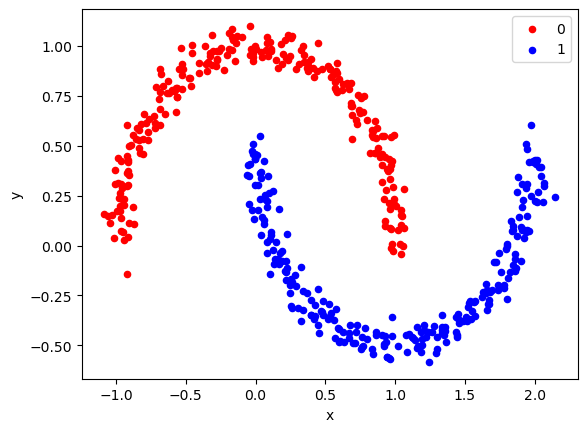

In [2]:
X, y = make_moons(n_samples=500, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = y))

colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()

In [3]:
import torch
from torch import nn
import torch.optim as optim

In [4]:
# Layers using torch's atomic operations
class CustomLinear(nn.Module):
    def __init__(self, _in, _out):
        super().__init__()
        
        self._in = _in
        self._out = _out
        
        # We want to implement the Linear transformation: Z = W * X + B
        
        # W: _in is the feature vector size (n). We need weights with shape (m x n), where m is number of neuron
        weight = torch.Tensor(_out, _in)
        self.weight = nn.Parameter(weight) # register weights as network parameters
        
        # B: Bias with shape (1 x m)
        bias = torch.Tensor(_out)
        self.bias = nn.Parameter(bias) # register bias as network parameters
        
        # Initialze weights (W) and biases (B)
        torch.nn.init.uniform_(self.weight, -1, 1)
        torch.nn.init.uniform_(self.bias, -1, 1)
        
    def __repr__(self):
        return f"CustomLinear(in_features={self._in}, out_features={self._out}, bias=VeryBiasedBehavior)"
    
    def forward(self, x: torch.tensor):
        z = torch.matmul(x, self.weight.t())
        z = torch.add(z, self.bias)
        return z 
    

In [5]:
class CustomSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 1/ (1 + (torch.exp(-x)))

In [6]:
# Vanilla Neural Network with custom layers
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            CustomLinear(2,8),
            CustomSigmoid(),
            CustomLinear(8, 8),
            CustomSigmoid(),
            CustomLinear(8, 1),
            CustomSigmoid(),
        )

    def forward(self, x):
        logits = self.model(x)

        return logits

In [7]:
model = NeuralNetwork().to('cpu')
print(model)

NeuralNetwork(
  (model): Sequential(
    (0): CustomLinear(in_features=2, out_features=8, bias=VeryBiasedBehavior)
    (1): CustomSigmoid()
    (2): CustomLinear(in_features=8, out_features=8, bias=VeryBiasedBehavior)
    (3): CustomSigmoid()
    (4): CustomLinear(in_features=8, out_features=1, bias=VeryBiasedBehavior)
    (5): CustomSigmoid()
  )
)


In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0727,  0.0752],
         [ 0.6519, -0.5775],
         [-0.2839,  0.9854],
         [ 0.5971,  0.6862],
         [ 0.9759, -0.5631],
         [ 0.6297, -0.4497],
         [ 0.1399, -0.8444],
         [ 0.8213, -0.8027]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8853, -0.8508,  0.5303,  0.5092,  0.9093,  0.0832, -0.4351,  0.2115],
        requires_grad=True),
 Parameter containing:
 tensor([[-1.8462e-02, -9.8956e-02,  6.2537e-01,  9.9705e-01,  8.5463e-01,
          -8.0894e-01, -9.4352e-01, -1.3340e-01],
         [ 5.9272e-01,  6.4305e-01,  2.5840e-02,  6.3845e-01, -4.1747e-01,
          -6.5943e-01,  6.7060e-01,  7.0857e-01],
         [ 7.1210e-01, -2.1207e-04,  1.9586e-01, -8.8810e-01,  3.5979e-01,
          -4.3832e-01,  2.8097e-01,  8.3236e-01],
         [ 8.7267e-01, -7.4233e-01, -2.6817e-01, -8.9108e-01,  6.3984e-01,
           3.4139e-01, -9.7274e-01, -7.8396e-01],
         [-7.3239e-01,  6.4077e-01, -3.9621e-01, -9.9130e-01,  3.5

In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.2)

In [10]:
# Convert test data in numpy array to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32, requires_grad = True)
y_train_t = torch.tensor(y_train, dtype=torch.float32, requires_grad = True)

y_train_t = y_train_t.unsqueeze(1)

In [11]:
# Training loop
n_epochs = 150
for epoch in range(n_epochs):
    
    # Forward pass
    y_pred = model.forward(X_train_t)
    
    model.parameters()
    
    loss = criterion(y_pred, y_train_t)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Evaluation
    print(loss)

tensor(0.7414, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7314, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7239, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7183, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7141, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7107, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7080, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7059, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7040, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7024, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7009, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6996, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6983, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6972, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6960, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6949, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6938, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6928, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6917, grad_fn=<Bina

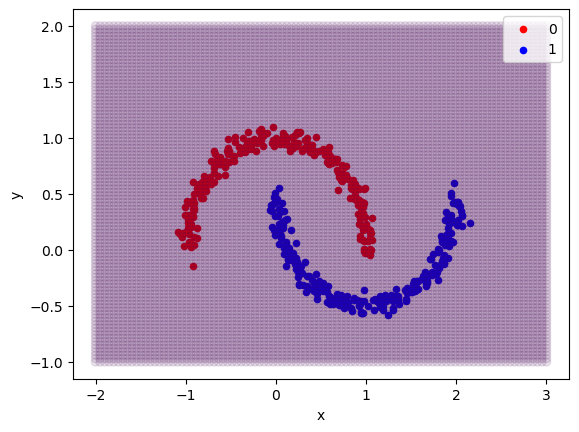

In [12]:
X, Y = np.mgrid[-2:3:100j,-1:2:100j]
X = X.flatten()
Y = Y.flatten()

# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
prediction = [1 if model.forward(torch.tensor([x,y], dtype=torch.float32)) > 0.8 else 0 for x, y in zip(X,Y)]
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.scatter(X, Y, alpha = 0.1, c = prediction)
plt.show()
